In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
X_N = pd.read_csv(r'D:\data science\taitanic\cleandata.csv')

In [8]:
df = pd.read_csv(r'D:\data science\taitanic\train.csv')

In [9]:
Y = df['Survived']

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RForest = RandomForestClassifier(random_state=2020, n_estimators=120, class_weight={1:0.6 , 0:0.4})
par = {'criterion':['gini','entropy'],
       'max_depth':[2,3,4,5,6],
       'min_samples_split':[3,4,5],
        'max_features':[0.8,0.9,0.95]}
       
GS = GridSearchCV(RForest, param_grid=par, cv=4, scoring='accuracy')
GS.fit(X_N, Y)
print(GS.best_score_)
print(GS.best_params_)

0.8283137397487174
{'criterion': 'gini', 'max_depth': 6, 'max_features': 0.9, 'min_samples_split': 4}


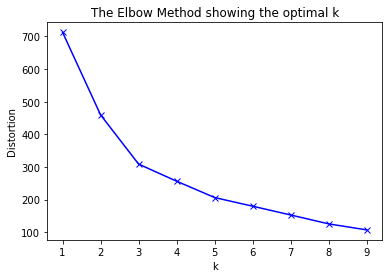

In [12]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(random_state=2022, n_clusters=k, max_iter=200)
    model.fit(X_N)
    distortions.append(model.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

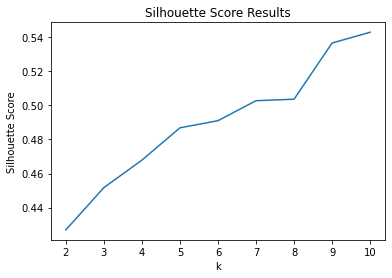

In [13]:
sil = []
from sklearn.metrics import silhouette_score
for K in range(2,11):
    model = KMeans(n_clusters=K)
    model.fit(X_N)
    L = model.labels_
    sil.append(silhouette_score(X_N, L))
plt.plot(range(2,11), sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Results')
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(random_state=2022, n_clusters=3, max_iter=200)
kmeans_model.fit(X_N)
L = kmeans_model.labels_

In [22]:
df['cluster'] = L

In [23]:
df[df['cluster'] == 1]['Survived'].value_counts()

1    130
0     62
Name: Survived, dtype: int64

In [24]:
df[df['cluster'] == 2]['Survived'].value_counts()

1    146
0     77
Name: Survived, dtype: int64

In [25]:
df.loc[df['cluster']==2,'cluster'] = 1

In [27]:
df[df['cluster'] == 0]['Survived'].value_counts()

0    410
1     66
Name: Survived, dtype: int64

In [28]:
L = df['cluster']
print(confusion_matrix(Y, L))
print(accuracy_score(Y, L))

[[410 139]
 [ 66 276]]
0.7699214365881033


In [29]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(random_state=2022, n_clusters=2, max_iter=200)
kmeans_model.fit(X_N)
L = kmeans_model.labels_

In [30]:
print(confusion_matrix(Y, L))
print(accuracy_score(Y, L))

[[474  75]
 [194 148]]
0.6980920314253648


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
par = {'weights':['uniform','distance'],
        'n_neighbors':[6,5,8,9,10,11,12,13,14,20,17]}
GS = GridSearchCV(KNN, param_grid=par, cv=4, scoring='accuracy')
GS.fit(X_N, Y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 5, 8, 9, 10, 11, 12, 13, 14, 20,
                                         17],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [32]:
print(GS.best_score_)
print(GS.best_params_)

0.8136993495737891
{'n_neighbors': 12, 'weights': 'uniform'}


In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2020,criterion= 'entropy', max_depth= 6, min_samples_leaf= 1, min_samples_split=4)     
pred_tree = cross_val_predict(tree, X_N, Y, cv=5)


In [34]:
print(confusion_matrix(Y, pred_tree))
print(accuracy_score(Y, pred_tree))

[[475  74]
 [ 99 243]]
0.8058361391694725


In [36]:
from sklearn.svm import SVC
SV_model = SVC(class_weight='balanced')
par = {'C':[10,100,150,200,0.05,0.5],
       'degree':[2,3,4,5],
       'kernel':['poly']}
      

GS = GridSearchCV(SV_model, param_grid=par, cv=4, scoring='accuracy')
GS.fit(X_N, Y)
print(GS.best_score_)
print(GS.best_params_)

0.8125782733406052
{'C': 100, 'degree': 3, 'kernel': 'poly'}


In [37]:
from sklearn.svm import SVC
SV_model = SVC(class_weight='balanced')
# kernel='linear', 'poly', 'rbf'
par = [
       {'C':[0.1,1,10,100],
       'gamma':[1,0.1,0.001,0.0001],
       'kernel':['rbf']},
       {'C':[0.1,1,10,100],
       'kernel':['linear']},
        {'C':[0.1,1,10,100],
       'degree':[2,3],
       'kernel':['poly']}
      ]

GS = GridSearchCV(SV_model, param_grid=par, cv=4, scoring='recall')
GS.fit(X_N, Y)
print(GS.best_score_)
print(GS.best_params_)

0.7835841313269494
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [38]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=200, random_state=2020, verbose=0, validation_fraction=0.1, 
                    activation='relu', hidden_layer_sizes=(4,2), early_stopping=True, n_iter_no_change=5,
                    learning_rate_init=0.01, learning_rate='invscaling')
pred_NN = cross_val_predict(MLP, X_N, Y, cv=5)
print(confusion_matrix(Y, pred_NN))
print(accuracy_score(Y, pred_NN))

[[490  59]
 [201 141]]
0.7081930415263749


In [40]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()

cv = StratifiedKFold(n_splits=10)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

RS = RandomizedSearchCV(model, space, n_iter=200, scoring='accuracy', cv=cv, random_state=1)

RS.fit(X_N, Y)
print(RS.best_score_)
print(RS.best_params_)

0.8114232209737828
{'C': 0.030673510835226868, 'penalty': 'l2', 'solver': 'newton-cg'}


In [41]:
from mlxtend.classifier import EnsembleVoteClassifier

In [42]:
!pip install mlxtend==0.18.0

In [44]:
from sklearn.ensemble import BaggingClassifier
bclf = BaggingClassifier(base_estimator=SV_model, n_estimators=20, max_samples=0.9, random_state=2020)
scores = cross_val_score(bclf, X_N, Y, cv=5, scoring='accuracy')
print(scores.mean())

0.7901261691042621


In [45]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = SVC(class_weight={1:0.7 , 0:0.3}, C=0.1, gamma= 1, kernel='rbf')
clf2 = SVC(class_weight={1:0.7 , 0:0.3}, C=100, degree= 3, kernel='poly')
clf3 = LogisticRegression(C=0.03,penalty='l2',solver='newton-cg')

vclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1.5,1.5,2], voting='hard')
scores = cross_val_score(vclf, X_N, Y, cv=5, scoring='accuracy')
print(scores.mean())

0.7811436821291822
